## Importing required libraries

In [ ]:
#Importing the Required Librarires
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import plotly
import plotly.graph_objects as go 
from sklearn.preprocessing import KBinsDiscretizer as KD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import BorderlineSMOTE, SMOTE

## Overall Dataframe Analysis

In [ ]:
import pandas as pd
df = pd.read_csv ('transactionV2.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,128037,2019-03-11 17:22:21,2296006538441789,fraud_Stamm-Witting,shopping_net,4.080000,Judy,Hogan,F,4970 Michelle Burgs,Brooklyn,NY,11217,40.681600,-73.979800,2504700,Medical sales representative,1999-09-01,250f7bdb3d040d18de14a51b17300cb8,1331486541,40.577566,-73.222286,False
1,491755,2019-08-03 03:45:26,30360260465747,fraud_Bradtke PLC,grocery_pos,124.900000,Jennifer,Garcia,F,28777 Stewart Plains Apt. 495,Putnam,IL,61560,41.194900,-89.440900,754,"Presenter, broadcasting",1962-05-13,44ec0dc9f8bd8b64c4b527e5b80431c7,1343965526,42.089683,-89.516604,False
2,470924,2019-07-26 19:30:01,503848303379,fraud_Schoen-Quigley,kids_pets,173.390000,Gregory,Wallace,M,27203 Darrell Landing,Saint James City,FL,33956,26.529000,-82.091600,3776,Sport and exercise psychologist,1976-09-12,74dd18242d9888aa07da26f50c4759d7,1343331001,25.685711,-81.378745,False
3,491263,2019-08-02 23:40:30,4169759661243568,"fraud_McDermott, Osinski and Morar",home,38.550000,Jamie,Carr,F,55363 Aaron Circle Suite 450,Lawn,PA,17041,40.223600,-76.538000,213,Special educational needs teacher,1972-02-15,85ef13213b756317285e7859540eecb4,1343950830,40.188092,-76.450154,False
4,836489,2019-12-12 16:51:32,4810789809665942990,fraud_Kozey-Boehm,shopping_net,7.110000,Julie,Sanchez,F,916 Charles Road,Bowersville,OH,45307,39.575600,-83.715300,338,Quantity surveyor,1988-07-28,b531c4476ccb4d3e0788bb5c4ca28593,1355331092,40.155245,-83.894408,False


In [ ]:
print(df.columns,df.shape)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object') (90767, 23)


#### Checking for any duplicate entries in data

In [ ]:
df.groupby(['trans_date_trans_time', 'cc_num']).size().reset_index().sort_values(0, ascending = False)

,trans_date_trans_time,cc_num,0
19603,2019-05-23 02:48:05,630425673344,4
42279,2019-09-23 14:37:43,6506116513503136,3
83008,2020-05-27 09:29:43,4708992452821239,3
12186,2019-04-04 22:57:22,5144043920225212,3
25774,2019-06-24 20:03:23,4742883543039288059,3
...,...,...,...
29749,2019-07-15 11:56:53,2305336922781618,1
29748,2019-07-15 11:56:20,373905417449658,1
29747,2019-07-15 11:51:46,4798937978667559470,1
29746,2019-07-15 11:43:27,4715741951931168360,1


In [ ]:
df = df.drop_duplicates()

The dataframe had 90767 rows orignially with 23 columns. However some of the transactions were duplicate which were identified as they had the same "cc-num" and transaction date time. After removing these duplicates, the dataframe has 87668 rows.

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
count,87668.000000,87668.000000,87668.000000,87668.000000,87668.000000,87668.000000,87668.000000,87668.000000,87668.000000,87668.000000
mean,649679.633481,412763425046210688.000000,70.351084,48824.158861,38.543876,-90.219898,88982.404264,1349288991.282931,38.543066,-90.219563
std,374432.373255,1303173490082132736.000000,144.367586,26916.787266,5.063867,13.752612,299959.063714,12844741.295600,5.096734,13.763514
min,40.000000,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325377849.000000,19.029798,-166.625519
25%,325447.250000,180036456789979.000000,9.750000,26237.000000,34.620500,-96.790900,744.000000,1338792962.500000,34.743708,-96.863072
50%,651012.500000,3519607465576254.000000,47.670000,48174.000000,39.371600,-87.476900,2456.000000,1349373029.000000,39.393632,-87.438273
75%,973718.500000,4635330563105903.000000,82.900000,72042.000000,42.015800,-80.128400,20478.000000,1359472713.000000,41.991612,-80.225630
max,1296673.000000,4992346398065154048.000000,14112.590000,99783.000000,66.693300,-67.950300,2906700.000000,1371816816.000000,67.510267,-66.984227


#### Checking for Null Values in dataset.

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

This shows that the dataframe has no missing values


#### Binning Population to tier 1, tier 2 and tier 3 cities

In [ ]:
df['city_pop_binned'] = pd.qcut(df['city_pop'],4,labels= ['tier1','tier2','tier3','tier4'])

In [ ]:
df['city_pop_binned'].value_counts()

tier3    22063
tier2    21942
tier1    21923
tier4    21740
Name: city_pop_binned, dtype: int64

Based on the population , the "city-pop" column has been divided in 4 tiers of equal entries. The city population needed to be binned to give a more clear picture in categorizing cities for fraud detection. My hypothesis was that their is a higher probability of a credit card fraud happening in a city with more population. 

### Inspecting Fraud and Not Fraud using Transaction Amount

In [ ]:
df['is_fraud'].value_counts(sort = True,ascending = False)

False    85943
True      1725
Name: is_fraud, dtype: int64

On checking the distribution between fraud and not fraud, I observed that this dataset is highly imbalanced as roughly only 2% of transactions were labelled fraud

count   87668.000000
mean       70.351084
std       144.367586
min         1.000000
25%         9.750000
50%        47.670000
75%        82.900000
max     14112.590000
Name: amt, dtype: float64


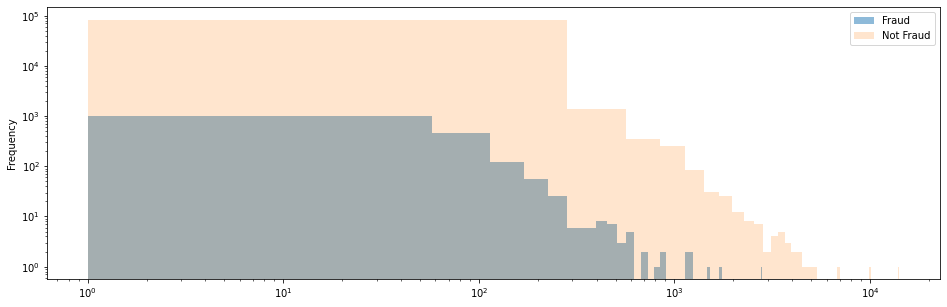

In [ ]:

df_f = df[df.is_fraud == True]
df_nf = df[df.is_fraud == False]
df_f['amt'].plot(kind = 'hist', figsize = (16,5), bins= 50, alpha = 0.5, logy = True, logx = True,label = 'Fraud')
df_nf['amt'].plot(kind = 'hist', figsize = (16,5), bins= 50, alpha = 0.2, logy = True, logx= True,label = 'Not Fraud')
### Rightly skewed plot for the transactionAmount
plt.legend(loc = 'upper right')
print(df.amt.describe())

We observe the Transaction Amount in a linear scale and observed that both Fraud and Non-Fraud cases are of same nature for the complete set of Transactions. So, I binned the Transaction Amount in 4 bins as per the quantile range and then observe the Fraud and Non-Fraud Classes

In [ ]:
df_overall = df['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'})
df_not_fraud = df.loc[df['is_fraud'] == 0 ,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'index': 'Row Type', 'amt':'Not Fraud Amt Distribution'})
df_fraud = df.loc[df['is_fraud'] == 1 ,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'index': 'Row Type', 'amt':'Fraud Amt Distribution'}) 
                      

pd.concat([df_overall,df_not_fraud,df_fraud],axis = 1)



,Row Type,Overall Amt Distribution,Not Fraud Amt Distribution,Fraud Amt Distribution
0,count,87668.000000,85943.000000,1725.000000
1,mean,70.351084,70.336649,71.070267
2,std,144.367586,144.607325,131.909028
3,min,1.000000,1.000000,1.000000
4,50%,47.670000,47.710000,45.980000
5,95%,196.590000,196.469000,204.960000
6,99.9%,1599.753210,1599.651460,1563.444600
7,max,14112.590000,14112.590000,2817.760000


Fraud Transaction mean was somewhat similar to not fraud. 
<br>
Mean amount of fraud transactions : 70.33
<br>
Mean amount of not fraud transactions : 71.07

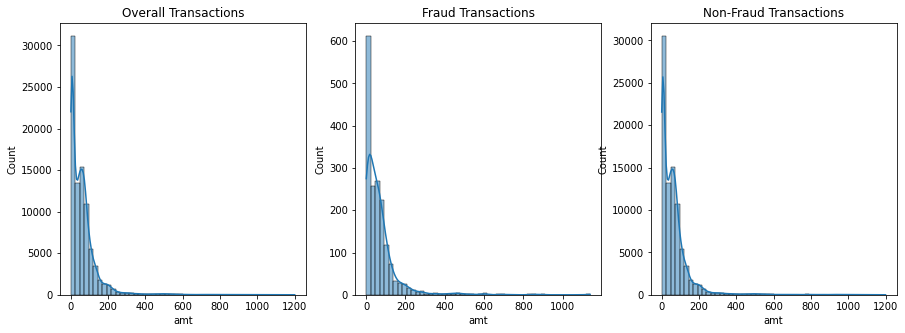

In [ ]:
fig_dims = (15, 5)
fig, axes = plt.subplots(1, 3, figsize=fig_dims)
sns.histplot(ax=axes[0], data=df[df['amt']<=1200], x="amt", bins=50, kde=True)
axes[0].set_title("Overall Transactions")
sns.histplot(ax=axes[1], data=df_f[df['amt']<=1200], x="amt", bins=50, kde=True)
axes[1].set_title("Fraud Transactions")
sns.histplot(ax=axes[2], data=df_nf[df['amt']<=1200], x="amt", bins=50, kde=True)
axes[2].set_title("Non-Fraud Transactions")
plt.show()

Both fraud and not fraud transaction amounts were right skewed. The transaction is exponential in nature

In [ ]:
bin = KD(n_bins=4, encode='ordinal', strategy='quantile')
transBinned = np.array(df['amt']).reshape(-1,1)
bin.fit(transBinned)
df['transBinned'] = bin.transform(transBinned)

In [ ]:
df_f = df[df.is_fraud == True]
df_nf = df[df.is_fraud == False]
print("Number of fraud cases for each ordinal quantile bin")
print(df_f.groupby('transBinned').agg({'is_fraud':'count'}))
print("\nNumber of non-fraud cases for each ordinal quantile bin")
print(df_nf.groupby('transBinned').agg({'is_fraud':'count'}))

Number of fraud cases for each ordinal quantile bin
             is_fraud
transBinned          
0.000000          419
1.000000          466
2.000000          421
3.000000          419

Number of non-fraud cases for each ordinal quantile bin
             is_fraud
transBinned          
0.000000        21489
1.000000        21458
2.000000        21497
3.000000        21499


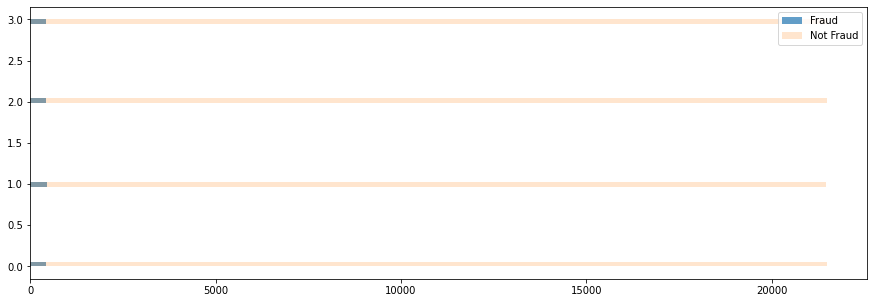

In [ ]:
plt.figure(figsize = (15, 5))
plt.hist(df_f['transBinned'], bins = 50, alpha = 0.7, label = 'Fraud', orientation='horizontal')
plt.hist(df_nf['transBinned'], bins = 50, alpha = 0.2, label = 'Not Fraud', orientation='horizontal')
plt.legend(loc = 'upper right')
plt.show()

These bins are divided on the basis on amount. We observe similar number of fraud and not fraud cases in each of the 4 bins

### Analysis on trans_date_trans_time column

#### Converting trans_date_trans_time to pd.datetime

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

#### Converting trans hour to time of day like "morning","evening" etc. 

In [ ]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df['time_of_day'] = pd.cut(df['trans_hour'], bins=b, labels=l, include_lowest=True)

In [ ]:
df['time_of_day'].loc[df['is_fraud']==1].value_counts()

Noon             370
Eve              367
Night            280
Late Night       271
Morning          222
Early Morning    215
Name: time_of_day, dtype: int64

In [ ]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week'].value_counts(sort = True,ascending=False)

Monday       17245
Sunday       17101
Saturday     13552
Tuesday      10730
Friday       10348
Thursday     10025
Wednesday     8667
Name: day_of_week, dtype: int64

In [ ]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')


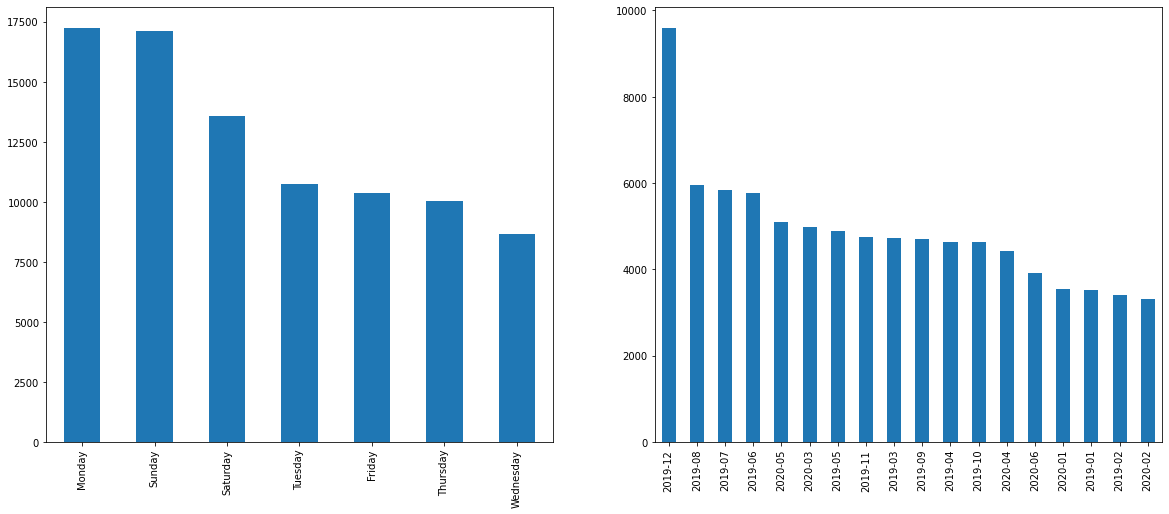

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
df['day_of_week'].value_counts().plot.bar()
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar()


Most number of Transactions happen on Monday and Sunday . When we observe the data month wise, its december. 

In [ ]:
df['dob'] = pd.to_datetime(df['dob'])

#### Converting the dob column to age. This is transaction day -  date of birth

In [ ]:
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age'].describe()

count   87668.000000
mean       46.080292
std        17.415953
min        14.000000
25%        33.000000
50%        44.000000
75%        57.000000
max        96.000000
Name: age, dtype: float64

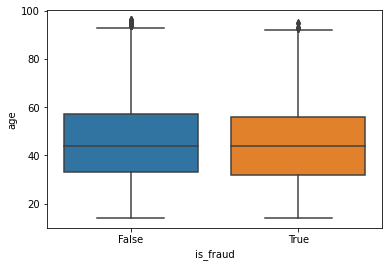

In [ ]:
sns.boxplot(data = df,x = "is_fraud",y = "age")

We get a similar age distribution for the fraud and not fraud category 

#### Transaction Timeline

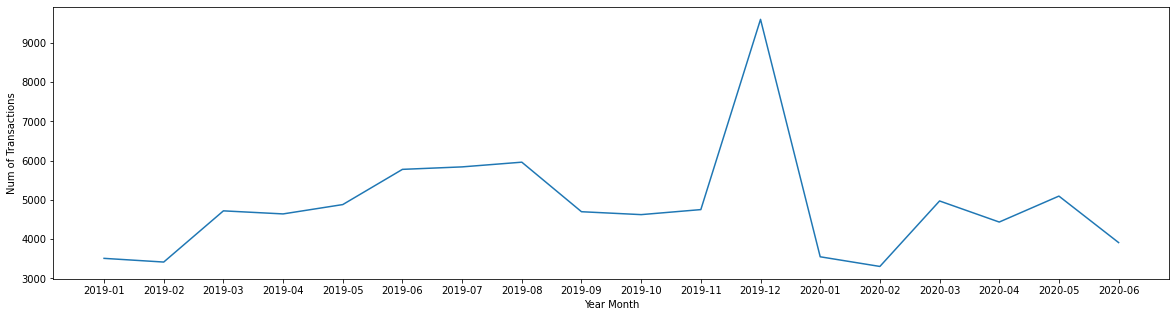

In [ ]:
df_timeline01 = df.groupby(df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()


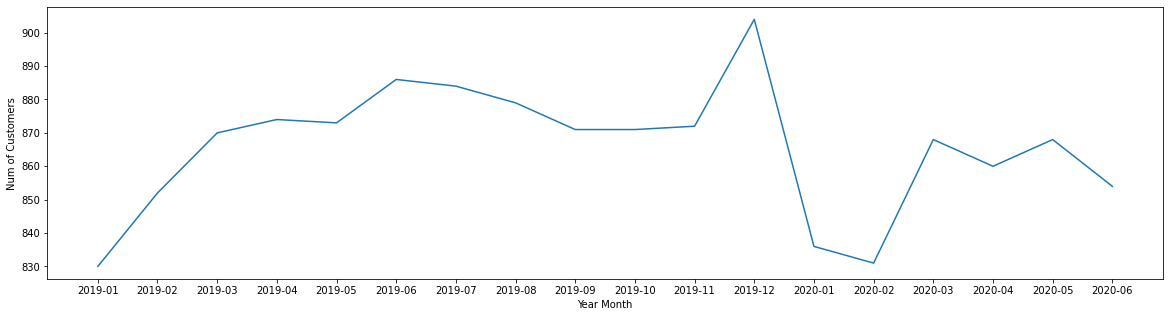

In [ ]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()


For both number of customers and number of transactions there is a spike in the month of december. this may be due to the holidays .

In [ ]:
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,70,68
1,2019-02,82,74
2,2019-03,103,98
3,2019-04,103,95
4,2019-05,85,78
5,2019-06,126,118
6,2019-07,112,102
7,2019-08,98,92
8,2019-09,97,90
9,2019-10,91,85


In [ ]:
print("Mean number of Fraud Transactions :",df_timeline02['num_of_fraud_transactions'].mean())
print("Mean number of Fraud Customers :",df_timeline02['fraud_customers'].mean())

Mean number of Fraud Transactions : 95.83333333333333
Mean number of Fraud Customers : 89.33333333333333


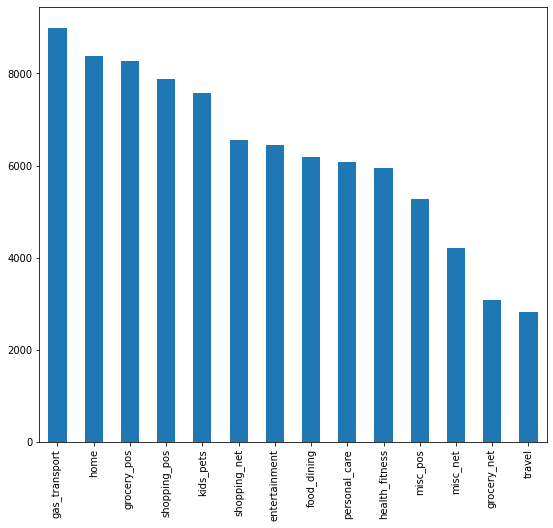

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();


Gas_transport , home and grocery stores accoutn for most number of Transactions

### Plotting categorical feature distribution as per the class labels

In [ ]:
def get_feature_distribution_df(df,column1,column2):
  df_group = df[[column1,column2]].groupby([column1]).count().reset_index()
  df_group.columns = [column1,'total_count']

  df_group['percent'] = (df_group['total_count']/df_group['total_count'].sum())*100

  df_fraud_group = df[[column1,'is_fraud',column2]].groupby([column1,'is_fraud']).count().reset_index()
  df_fraud_group.columns = [column1,'is_fraud','count_distribution']

  df_fraud_group = df_fraud_group.merge(df_group[[column1,'total_count']],how='inner',\
                                  left_on=column1,right_on=column1)[:20]
  df_fraud_group = df_fraud_group.sort_values(by = ['total_count'], ascending=False)
  
  return df_fraud_group






In [ ]:
def plot_feature_distribution_df(df,column1,column2):
  sns.set_theme(style="whitegrid")


  g = sns.catplot(
      data=df, kind="bar",
      x=column1, y=column2, hue="is_fraud",
      ci="sd", palette="dark", alpha=.4, height=6
  )
  g.fig.set_size_inches(22,10)
  g.despine(left=True)
  g.set_axis_labels("", "Number of Transactions (g)")
  g.legend.set_title("Distribution of category with fraud and not fraud")
  ax = g.facet_axis(0,0)
  g.set_xticklabels(rotation=30)
  for p in ax.patches:
      ax.text(p.get_x() - 0.01, 
              p.get_height() * 1.02, 
            '{0:.1f}'.format(p.get_height()),   #Used to format it K representation
              color='black', 
              rotation='horizontal', 
              size='large')

#### Gender Distribution in Fraud and not Fraud Category

In [ ]:
df_fraud_gender1 = get_feature_distribution_df(df,'gender','trans_num')
df_fraud_gender1.head()

,gender,is_fraud,count_distribution,total_count
0,F,False,46981,47934
1,F,True,953,47934
2,M,False,38962,39734
3,M,True,772,39734


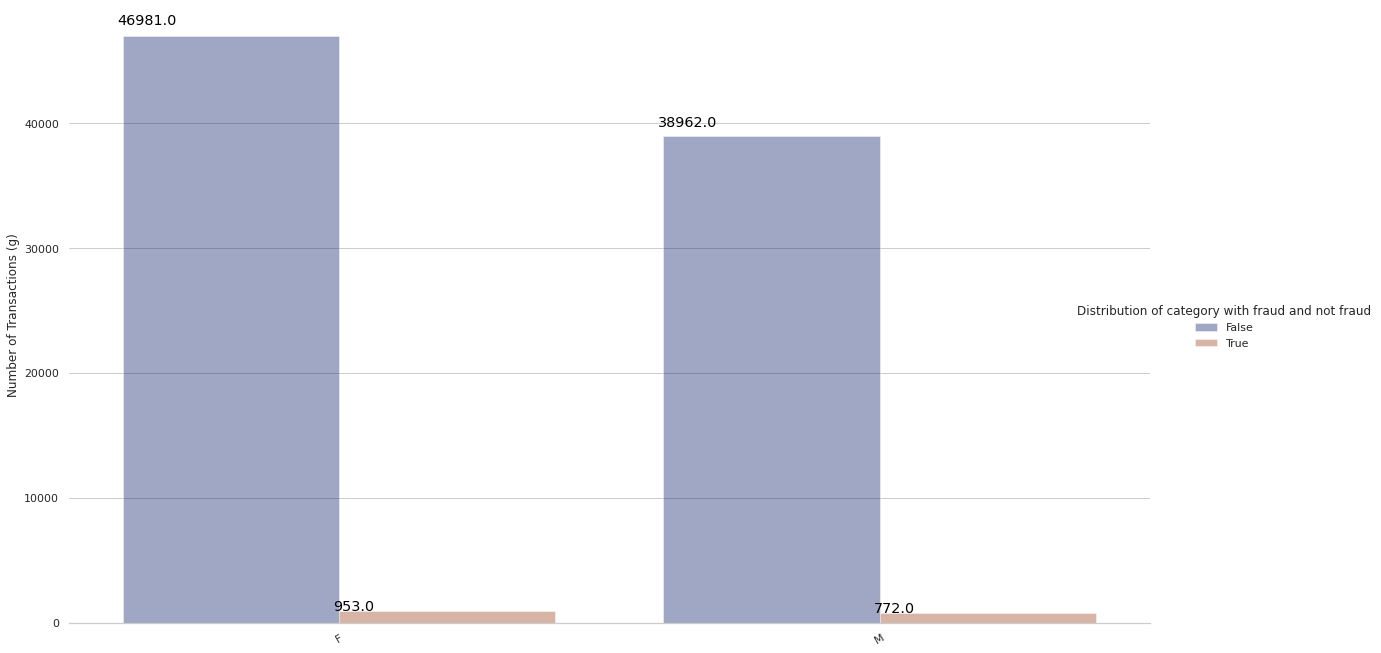

In [ ]:
plot_feature_distribution_df(df_fraud_gender1,'gender','count_distribution')

These is not much difference between males and females when considering the fraud class

#### Category Distribution in Fraud and not Fraud Category

In [ ]:
df_fraud_category1 = get_feature_distribution_df(df,'category','trans_num')
df_fraud_category1.head()

,category,is_fraud,count_distribution,total_count
4,gas_transport,False,8844,8990
5,gas_transport,True,146,8990
12,home,False,8190,8368
13,home,True,178,8368
8,grocery_pos,False,8091,8261


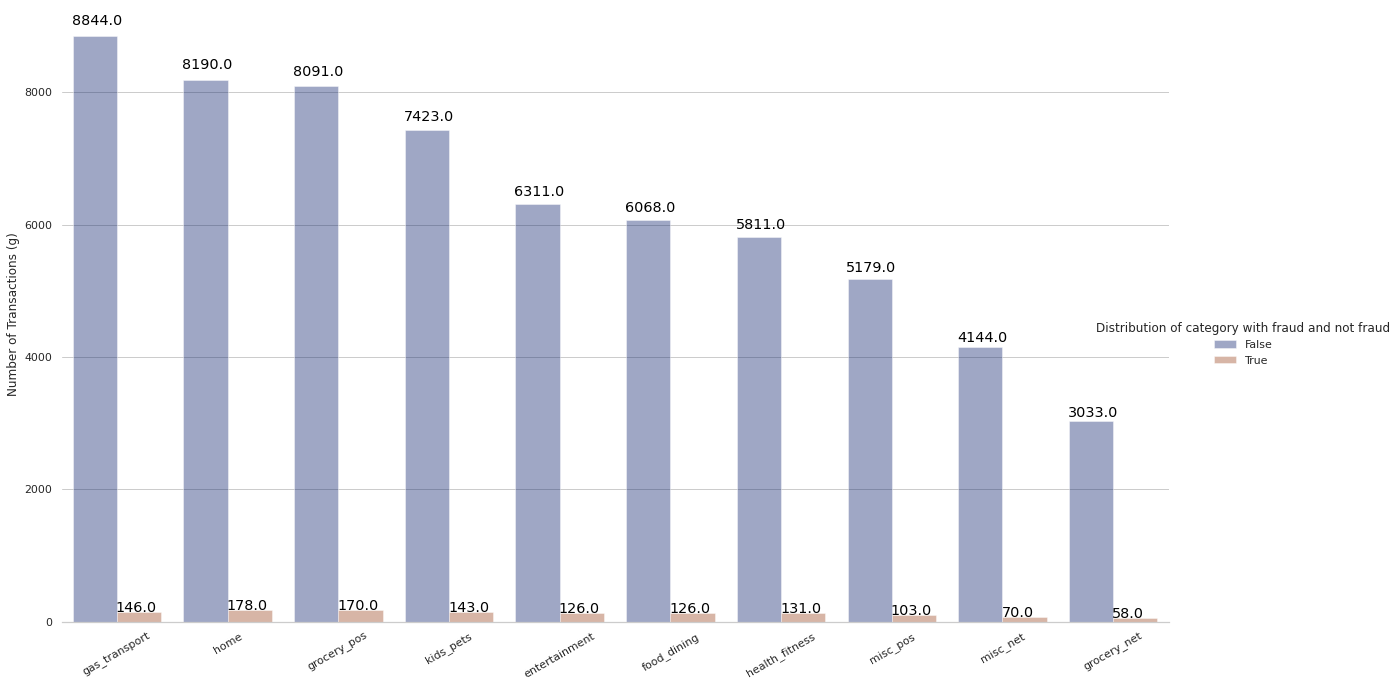

In [ ]:
plot_feature_distribution_df(df_fraud_category1,'category','count_distribution')

Home, Grocery store and Gas stations  accounts for most Fraud Transactions

#### Job Distribution in Fraud and not Fraud Category

In [ ]:
df_fraud_job1 = get_feature_distribution_df(df,'job','trans_num')
df_fraud_job1

,job,is_fraud,count_distribution,total_count
4,Accounting technician,False,317,324
5,Accounting technician,True,7,324
8,Administrator,False,253,256
9,Administrator,True,3,256
16,"Administrator, local government",False,180,184
17,"Administrator, local government",True,4,184
14,"Administrator, education",False,161,164
15,"Administrator, education",True,3,164
2,"Accountant, chartered public finance",False,156,163
3,"Accountant, chartered public finance",True,7,163


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


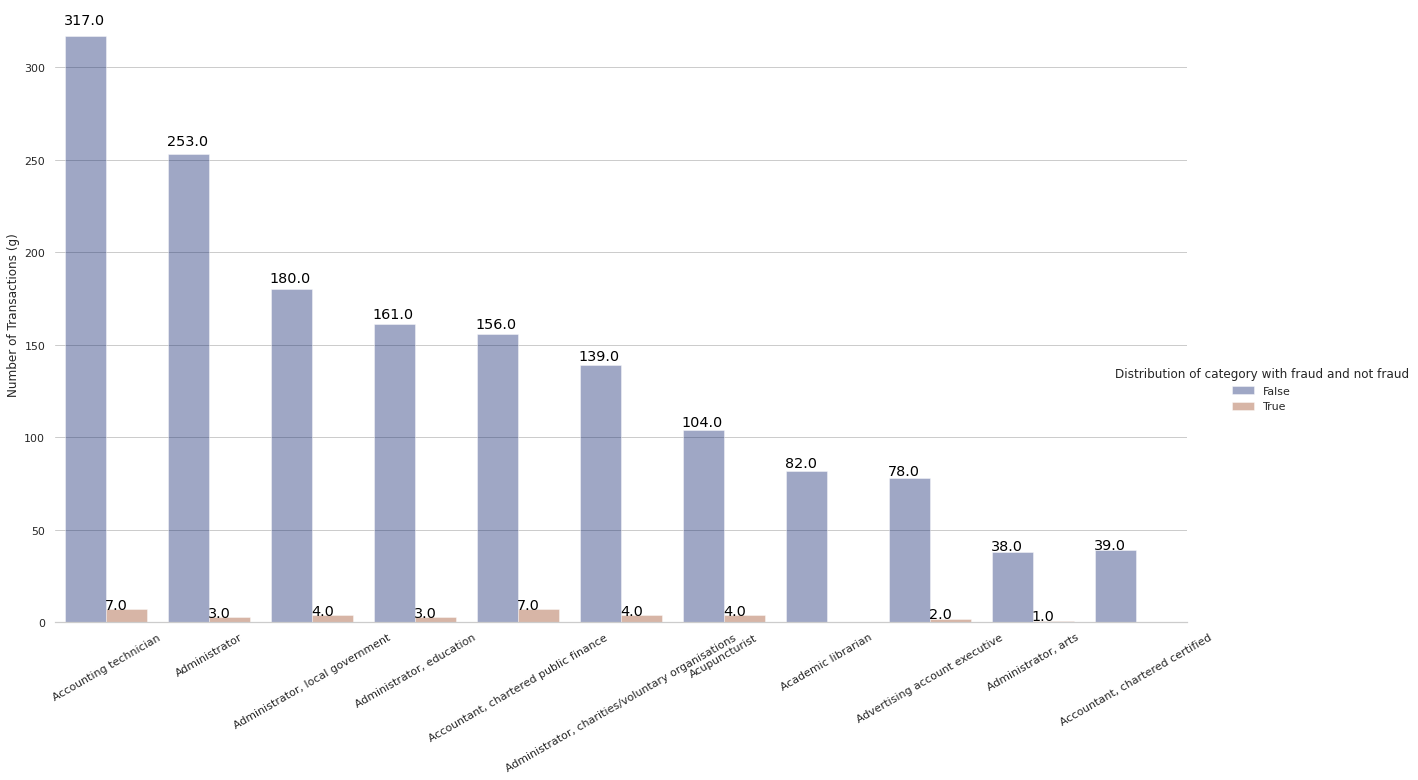

In [ ]:
plot_feature_distribution_df(df_fraud_job1,'job','count_distribution')

Job distribution does not tell much about distribution so I will not include this feature

#### Merchant Distribution in Fraud and not Fraud Category

In [ ]:
df_fraud_merchant = get_feature_distribution_df(df,'merchant','trans_num')
df_fraud_merchant

,merchant,is_fraud,count_distribution,total_count
13,fraud_Altenwerth-Kilback,False,174,177
14,fraud_Altenwerth-Kilback,True,3,177
6,fraud_Abshire PLC,False,146,149
7,fraud_Abshire PLC,True,3,149
4,fraud_Abernathy and Sons,False,144,145
5,fraud_Abernathy and Sons,True,1,145
11,"fraud_Altenwerth, Cartwright and Koss",False,130,135
12,"fraud_Altenwerth, Cartwright and Koss",True,5,135
0,fraud_Abbott-Rogahn,False,131,133
1,fraud_Abbott-Rogahn,True,2,133


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


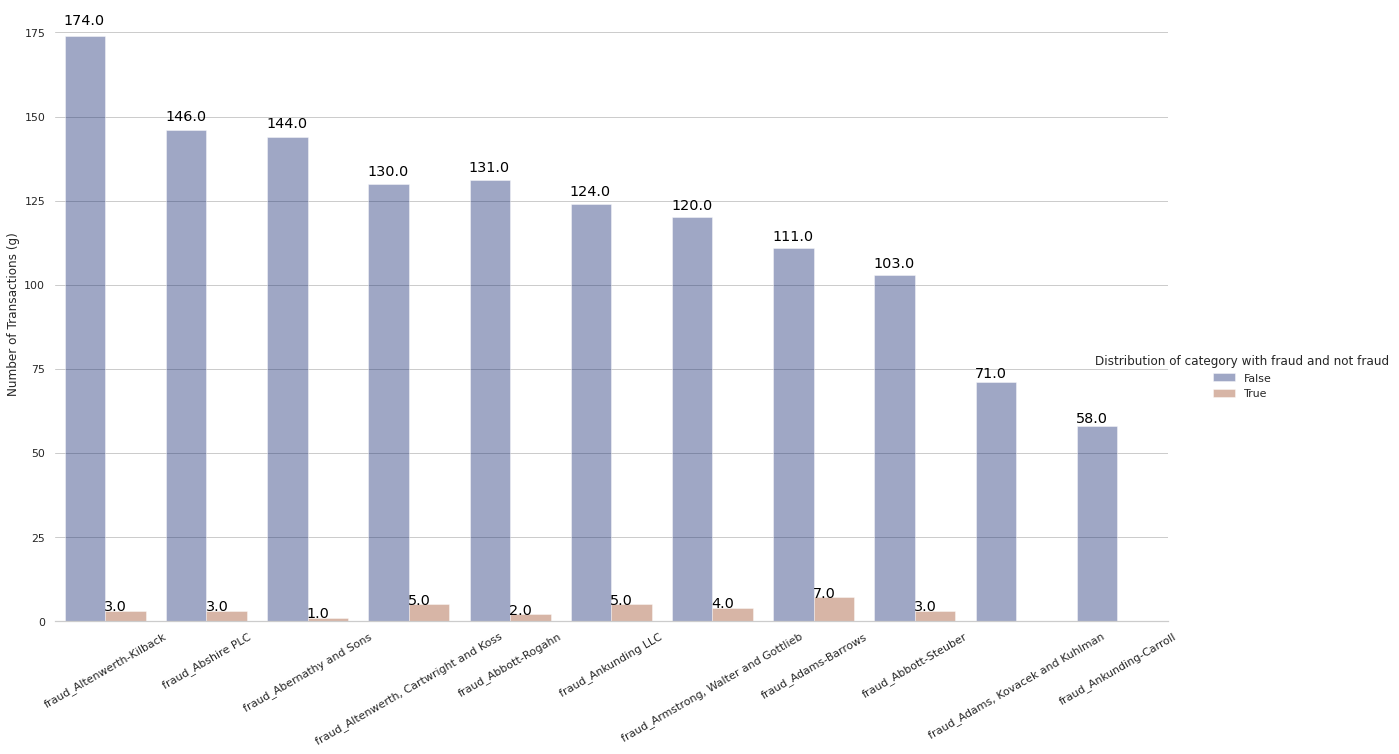

In [ ]:
plot_feature_distribution_df(df_fraud_merchant,'merchant','count_distribution')

Merchant details are also not so important to be included in feature set

In [ ]:
df_fraud_state = get_feature_distribution_df(df,'state','trans_num')
df_fraud_state

,state,is_fraud,count_distribution,total_count
8,CA,False,3830,3902
9,CA,True,72,3902
18,FL,True,67,2919
17,FL,False,2852,2919
2,AL,False,2662,2707
3,AL,True,45,2707
4,AR,False,2124,2173
5,AR,True,49,2173
19,GA,False,1677,1713
11,CO,True,20,959


In [ ]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100


df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['category','category_count']],how='inner',\
                                  left_on='category',right_on='category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100


df_fraud_category

,category,is_fraud,count,category_count,percent_grp
0,entertainment,False,6311,6437,98.042566
1,entertainment,True,126,6437,1.957434
2,food_dining,False,6068,6194,97.965773
3,food_dining,True,126,6194,2.034227
4,gas_transport,False,8844,8990,98.375973
5,gas_transport,True,146,8990,1.624027
6,grocery_net,False,3033,3091,98.123585
7,grocery_net,True,58,3091,1.876415
8,grocery_pos,False,8091,8261,97.942138
9,grocery_pos,True,170,8261,2.057862


### Distance b/w customer and merchant

In [ ]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [ ]:
df['dist'] = haversine(df['lat'], df['long'],df['merch_lat'], df['merch_long'])
df['dist'].describe()

count   87668.000000
mean       76.129362
std        29.179422
min         0.022255
25%        55.271297
50%        78.312480
75%        98.611571
max       147.773874
Name: dist, dtype: float64

I used haversine distance to create a feature that calculates the distance between merchant and customer using merchant lat, long and customer lat, long

In [ ]:
df_grp = df.groupby(by = 'Unnamed: 0').sum()
df_grp

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,transBinned,trans_hour,age,dist
Unnamed: 0,,,,,,,,,,,,,,
40,676372984911,53.600000,66941,39.756200,-98.446200,242,1325377849,40.332519,-99.062962,0,2.000000,0,31.000000,82.843722
43,30074693890476,212.750000,67851,37.993100,-100.989300,2691,1325377935,38.862183,-101.234087,0,3.000000,0,25.000000,98.962039
80,5456776410929288,48.680000,16048,41.047200,-79.808900,139,1325379565,40.237898,-79.894073,0,2.000000,0,65.000000,90.276744
93,180048185037117,3.790000,7060,40.615200,-74.415000,71485,1325380197,40.813669,-75.283465,0,0.000000,1,44.000000,76.450454
127,5104807169438134,57.430000,11978,40.829500,-72.647300,3255,1325381650,41.669034,-73.271605,0,2.000000,1,40.000000,106.950989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296639,4449530933957323,135.510000,94971,38.242700,-122.914500,337,1371815841,38.987178,-123.901733,0,3.000000,11,66.000000,119.204272
1296646,5359543825610251,110.320000,59714,45.780100,-111.143900,18182,1371816133,44.875069,-111.290110,0,3.000000,12,45.000000,101.281835
1296647,4710826438164847616,10.140000,59542,48.832800,-108.396100,192,1371816147,48.382903,-108.571748,0,1.000000,12,56.000000,51.666227


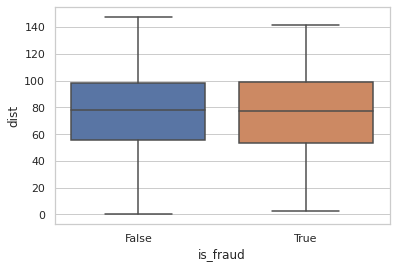

In [ ]:
sns.boxplot(data = df,x="is_fraud", y="dist")

### Rolling Transactions and Orders by Customer

In [ ]:

df1 = df
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time'})
df1 = df1.sort_index()
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,city_pop_binned,transBinned,trans_hour,time_of_day,day_of_week,year_month,age,dist
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:30:49,40,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.600000,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,KS,66941,39.756200,-98.446200,242,Tourism officer,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,1325377849,40.332519,-99.062962,False,tier1,2.000000,0,Late Night,Tuesday,2019-01,31.000000,82.843722
2019-01-01 00:32:15,43,2019-01-01 00:32:15,30074693890476,fraud_Lockman Ltd,grocery_pos,212.750000,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.993100,-100.989300,2691,Arboriculturist,1993-08-16,d9dcde500bed2cad48ee41e44c362596,1325377935,38.862183,-101.234087,False,tier3,3.000000,0,Late Night,Tuesday,2019-01,25.000000,98.962039
2019-01-01 00:59:25,80,2019-01-01 00:59:25,5456776410929288,fraud_Harris Inc,gas_transport,48.680000,Taylor,Khan,F,658 Diane Glen Apt. 677,North Washington,PA,16048,41.047200,-79.808900,139,Patent attorney,1954-05-25,673b35c970ef05a2acceb2af42f919d7,1325379565,40.237898,-79.894073,False,tier1,2.000000,0,Late Night,Tuesday,2019-01,65.000000,90.276744
2019-01-01 01:09:57,93,2019-01-01 01:09:57,180048185037117,"fraud_Rippin, Kub and Mann",misc_net,3.790000,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.615200,-74.415000,71485,Leisure centre manager,1974-07-19,7c63dd07b14aac7dc99f4587d83dd599,1325380197,40.813669,-75.283465,False,tier4,0.000000,1,Late Night,Tuesday,2019-01,44.000000,76.450454
2019-01-01 01:34:10,127,2019-01-01 01:34:10,5104807169438134,fraud_Smitham-Schiller,grocery_net,57.430000,Regina,Johnston,F,641 Steven Mall Apt. 299,Westhampton Beach,NY,11978,40.829500,-72.647300,3255,Financial trader,1978-07-08,7b8a169e6c95ced581a7f227f60803cf,1325381650,41.669034,-73.271605,False,tier3,2.000000,1,Late Night,Tuesday,2019-01,40.000000,106.950989


In [ ]:
df1['agg'] = 1

#### Number of orders in rolling 60 days per customer

In [ ]:
df_hist_trans_60d = \
    df1 .groupby(['cc_num'])['agg'].rolling('60D').count().shift().reset_index().fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [ ]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [ ]:
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-02,0.000000
1,60416207185,2019-01-11,1.000000
2,60416207185,2019-01-22,2.000000
3,60416207185,2019-01-27,3.000000
4,60416207185,2019-02-21,4.000000


#### Number of orders in rolling 7 days per customer

In [ ]:
df_hist_orders_7d = \
    df1 \
    .groupby(['cc_num'])['agg']\
    .rolling('7D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_7d.columns = ['cc_num','trans_date','hist_trans_7d']

In [ ]:
df_hist_orders_7d['trans_date'] = df_hist_orders_7d['trans_date'].dt.date

#### Number of orders in rolling 24 Hours per customer

In [ ]:
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [ ]:
df_hist_orders_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-02 13:10:46,0.000000
1,60416207185,2019-01-11 23:59:30,1.000000
2,60416207185,2019-01-22 16:50:16,1.000000
3,60416207185,2019-01-27 03:20:41,1.000000
4,60416207185,2019-02-21 19:07:27,1.000000


#### Number of fraud Transactions in rolling 24 Hours per customer

In [ ]:
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== True]\
    .groupby(['cc_num'])['agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

#### Number of orders in rolling 2 Hours per customer

In [ ]:
df_hist_orders_2h = \
    df1 \
    .groupby(['cc_num'])['agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_2h.columns = ['cc_num','trans_date_trans_time','hist_trans_2h']

#### Average Transaction amount in rolling 60 days per customer

In [ ]:
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

#### Average transaction amount in rolling 24 Hours per customer

In [ ]:
df_hist_trans_amt_avg_24h = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('24H')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_24h.columns = ['cc_num','trans_date','hist_trans_avg_amt_24h']

In [ ]:
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

#### Merging all the rolling variables

In [ ]:
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [ ]:
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')
df2 = df2.merge(df_hist_orders_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

In [ ]:
df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

In [ ]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date
df_hist_trans_amt_avg_24h['trans_date'] = df_hist_trans_amt_avg_24h['trans_date'].dt.date

In [ ]:

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')
df2 = df2.merge(df_hist_orders_7d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')
df2 = df2.merge(df_hist_trans_amt_avg_24h,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [ ]:

# df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
#           right_on = ['cc_num','trans_date'],how = 'left')

# df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
#           right_on = ['cc_num','trans_date'],how = 'left')


In [ ]:
df2.isnull().sum()

Unnamed: 0                     0
trans_date_trans_time          0
cc_num                         0
merchant                       0
category                       0
amt                            0
first                          0
last                           0
gender                         0
street                         0
city                           0
state                          0
zip                            0
lat                            0
long                           0
city_pop                       0
job                            0
dob                            0
trans_num                      0
unix_time                      0
merch_lat                      0
merch_long                     0
is_fraud                       0
city_pop_binned                0
transBinned                    0
trans_hour                     0
time_of_day                    0
day_of_week                    0
year_month                     0
age                            0
dist      

Text(0.5, 1.0, 'Features Correlating with is Fraud')

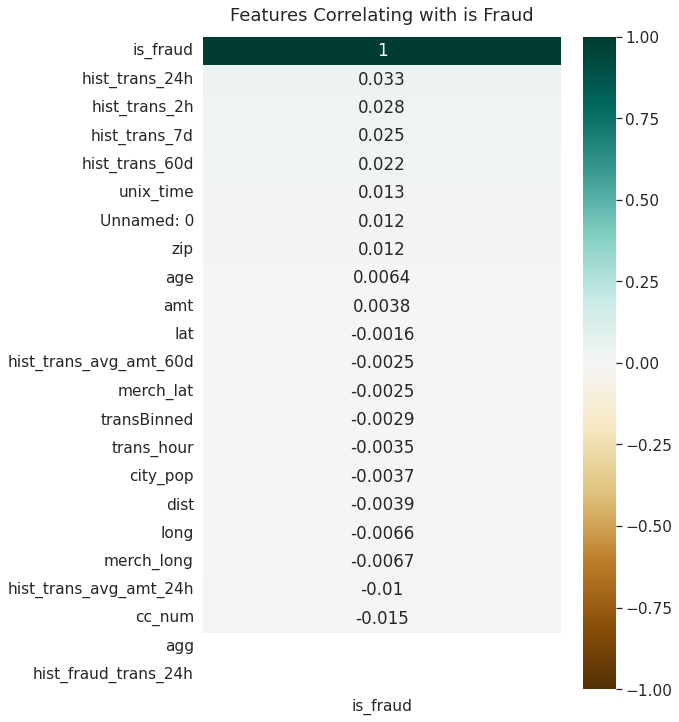

In [ ]:
plt.figure(figsize=(8, 12))
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
heatmap = sns.heatmap(df2.corr()[['is_fraud']].sort_values(by='is_fraud', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with is Fraud', fontdict={'fontsize':18}, pad=16)

#### Dropping all unnecessary columns that will not be used in modelling

In [ ]:
df2 = df2.drop(['trans_date_trans_time','merchant','first','last','street','city','state',
                'zip','lat','long','trans_num','unix_time','merch_lat','merch_long',
                'year_month','agg','trans_date','Unnamed: 0','cc_num','job','dob','gender','city_pop','hist_fraud_trans_24h','trans_hour'],axis = 1)

In [ ]:
df2.head()

,category,amt,is_fraud,city_pop_binned,transBinned,time_of_day,day_of_week,age,dist,hist_trans_60d,hist_trans_24h,hist_trans_2h,hist_trans_avg_amt_60d,hist_trans_7d,hist_trans_avg_amt_24h
0,gas_transport,53.600000,False,tier1,2.000000,Late Night,Tuesday,31.000000,82.843722,11.000000,1.000000,1.000000,56.038182,3.000000,58.450000
1,gas_transport,53.600000,False,tier1,2.000000,Late Night,Tuesday,31.000000,82.843722,11.000000,1.000000,1.000000,56.038182,3.000000,53.600000
2,gas_transport,53.600000,False,tier1,2.000000,Late Night,Tuesday,31.000000,82.843722,11.000000,1.000000,1.000000,56.038182,1.000000,58.450000
3,gas_transport,53.600000,False,tier1,2.000000,Late Night,Tuesday,31.000000,82.843722,11.000000,1.000000,1.000000,56.038182,1.000000,53.600000
4,gas_transport,53.600000,False,tier1,2.000000,Late Night,Tuesday,31.000000,82.843722,11.000000,1.000000,1.000000,53.600000,3.000000,58.450000


One hot encoding categorical columns

In [ ]:
df_encoded = pd.get_dummies(df2, columns=['category','day_of_week','city_pop_binned','time_of_day'])
df_encoded.head()

,amt,is_fraud,transBinned,age,dist,hist_trans_60d,hist_trans_24h,hist_trans_2h,hist_trans_avg_amt_60d,hist_trans_7d,hist_trans_avg_amt_24h,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,city_pop_binned_tier1,city_pop_binned_tier2,city_pop_binned_tier3,city_pop_binned_tier4,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night
0,53.600000,False,2.000000,31.000000,82.843722,11.000000,1.000000,1.000000,56.038182,3.000000,58.450000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,53.600000,False,2.000000,31.000000,82.843722,11.000000,1.000000,1.000000,56.038182,3.000000,53.600000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2,53.600000,False,2.000000,31.000000,82.843722,11.000000,1.000000,1.000000,56.038182,1.000000,58.450000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,53.600000,False,2.000000,31.000000,82.843722,11.000000,1.000000,1.000000,56.038182,1.000000,53.600000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
4,53.600000,False,2.000000,31.000000,82.843722,11.000000,1.000000,1.000000,53.600000,3.000000,58.450000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
# df_encoded['hist_fraud_trans_24h'] = df_encoded['hist_fraud_trans_24h'] .fillna(0)

In [ ]:
corr = df_encoded[df_encoded.columns].corr()

In [ ]:
df_encoded["is_fraud"] = df_encoded["is_fraud"].astype(int)

### Feature Correlation Analysis

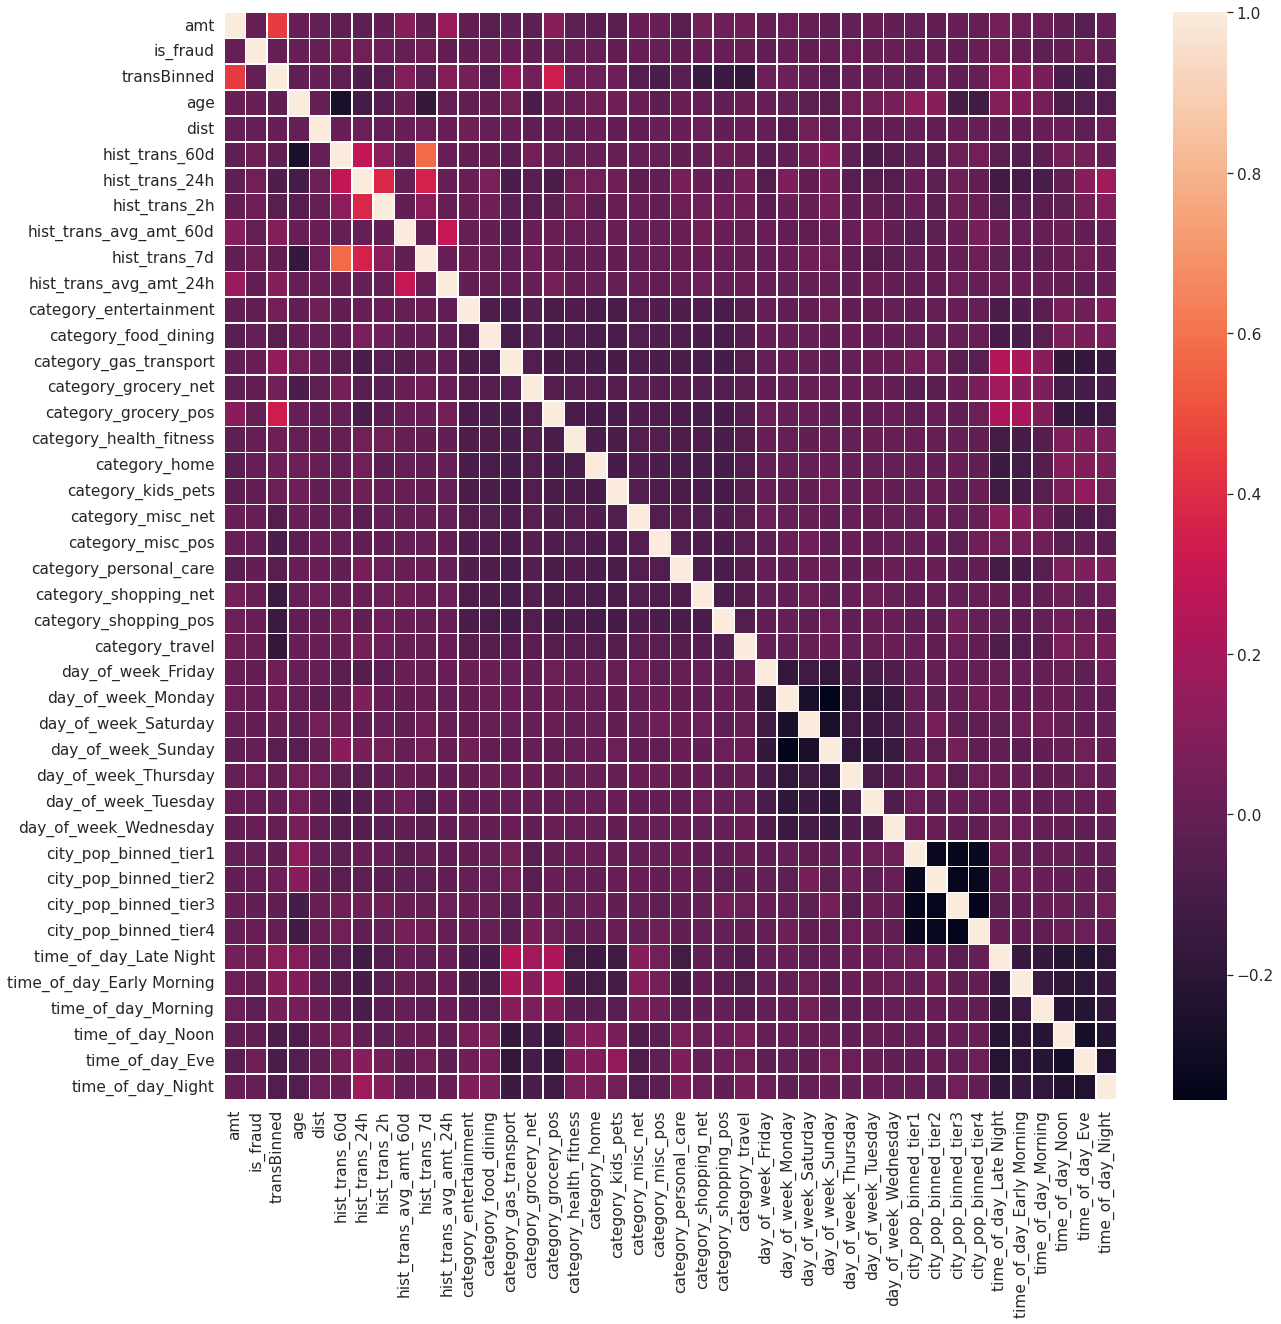

In [ ]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot =False,linewidths=.5)
plt.show()

The above correlation plot shows no Data leakage

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df_encoded.loc[:,'is_fraud']
X = df_encoded.drop(['is_fraud'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size=0.30, random_state=123)
X_train = X_train.reset_index(drop =True)
y_train = y_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
print("Structure of the train and test datasets -")
print("Trainig set:\n\tX:", X_train.shape,'\n\ty:',y_train.shape)
print("Testing set\n\tX::", X_test.shape,'\n\ty:',y_test.shape)

Structure of the train and test datasets -
Trainig set:
	X: (485084, 41) 
	y: (485084,)
Testing set
	X:: (207894, 41) 
	y: (207894,)


We have splitted the dataset into train data and test data.

The test size, I have used it 30%.

Also, I have used the stratification strategy so that percent of isFraud class remains consistent in both the train as well as the test dataset.

### SMOTE Sampling to handle imbalance

In [ ]:
def borderline_smote(X_train,y_train):
  bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
  X_os, y_os = bsmote.fit_resample(X_train, y_train)
  return X_os, y_os

In [ ]:
X_os, y_os = borderline_smote(X_train,y_train)
print("\nStructure of the train dataset after OverSampling -")
print("Trainig set:\n\tX:", X_os.shape,'\n\ty:',len(y_os))
print('Fraud case percentage before oversampling:', y_train.sum()/len(y_train)*100)
print('Fraud case percentage after oversampling:', y_os.sum()/len(y_os)*100)


Structure of the train dataset after OverSampling -
Trainig set:
	X: (949282, 41) 
	y: 949282
Fraud case percentage before oversampling: 2.1528230162198714
Fraud case percentage after oversampling: 50.0


In [ ]:
# import statsmodels.api as sm
# logit_model=sm.Logit(y_train,X_train)
# result=logit_model.fit()
# print(result.summary2())

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
def logistic_regression(train_x, train_y,test_x, test_y):
  model = LogisticRegression(max_iter = 120, random_state= 42, class_weight='auto')
  model.fit(train_x, train_y)
  print(model)
  # make predictions
  expected = test_y
  predicted = model.predict(test_x)
  # summarize the fit of the model
  print(classification_report(expected, predicted))
  print(confusion_matrix(expected, predicted))

In [ ]:
print(logistic_regression(X_os, y_os, X_test, y_test))

LogisticRegression(class_weight='auto', max_iter=120, random_state=42)
              precision    recall  f1-score   support

           0       0.98      0.64      0.77    203418
           1       0.02      0.34      0.04      4476

    accuracy                           0.63    207894
   macro avg       0.50      0.49      0.41    207894
weighted avg       0.96      0.63      0.76    207894

[[130018  73400]
 [  2965   1511]]
None


### Random Forest 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [ ]:
def randomforest(X_train,y_train,X_test,y_test):

  n_estimators = [50]
  max_features = ['auto', 'sqrt']
  max_depth = [15]
  # Create the random grid
  random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth':max_depth}
  rf_clf = RandomForestClassifier(random_state=42)
  rf_random = GridSearchCV(estimator = rf_clf, param_grid = random_grid, scoring = 'r2', verbose=1, n_jobs = -1,cv = 3)
  rf_random.fit(X_train,y_train)
  print("Best Parameters :",rf_random.best_params_)
  features = pd.Series(rf_random.best_estimator_.feature_importances_, index=X_train.columns)
  print('Top 10 features for prediction:')
  print(features.sort_values(ascending=False)[0:10])


  print("TRAIN SCORE :",rf_random.score(X_train, y_train))
  print("Train Results")
  pred_train = rf_random.best_estimator_.predict(X_train)

  print(confusion_matrix(y_train, pred_train))
  print(classification_report(y_train, pred_train))

  print("TEST RESULTS :")

  pred_test = pd.Series(rf_random.best_estimator_.predict(X_test).astype('int32'),index=y_test.index)

  print(confusion_matrix(y_test, pred_test))
  print(classification_report(y_test, pred_test))

  plot_confusion_matrix(rf_random.best_estimator_, X_test, y_test)
  plt.show()








Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters : {'max_depth': 15, 'max_features': 'auto', 'n_estimators': 50}
Top 10 features for prediction:
dist                     0.106296
amt                      0.092058
hist_trans_7d            0.091626
age                      0.087719
hist_trans_60d           0.082638
hist_trans_avg_amt_60d   0.077821
hist_trans_24h           0.069607
hist_trans_avg_amt_24h   0.052357
transBinned              0.024954
day_of_week_Monday       0.017673
dtype: float64
TRAIN SCORE : 0.9363603228545364
Train Results
[[460837  13804]
 [  1299 473342]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    474641
           1       0.97      1.00      0.98    474641

    accuracy                           0.98    949282
   macro avg       0.98      0.98      0.98    949282
weighted avg       0.98      0.98      0.98    949282

TEST RESULTS :
[[197483   5935]
 [   540   3936]]
              p

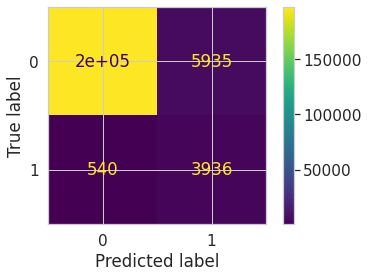

In [ ]:
randomforest(X_os,y_os,X_test,y_test)

### XGBOOST

In [ ]:
from xgboost import XGBClassifier
def xgboost(X_train,y_train,X_test,y_test):

  n_estimators = [50]
  max_features = ['auto', 'sqrt']
  max_depth = [20]
  # Create the random grid
  # random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth':max_depth}
  xbt_model = XGBClassifier(n_estimators = 50, learning_rate = 0.1, max_depth = 10, random_state=42, verbose = 1)
  xbt_model.fit(X_train, y_train)
  # rf_random.fit(X_train,y_train)
  # print("Best Parameters :",rf_random.best_params_)
  features = pd.Series(xbt_model.feature_importances_, index=X_train.columns)
  print('Top 10 features for prediction:')
  print(features.sort_values(ascending=False)[0:10])


  print("TRAIN SCORE :",xbt_model.score(X_train, y_train))
  print("Train Results")
  pred_train = xbt_model.predict(X_train)

  print(confusion_matrix(y_train, pred_train))
  print(classification_report(y_train, pred_train))

  print("TEST RESULTS :")

  pred_test = pd.Series(xbt_model.predict(X_test).astype('int32'),index=y_test.index)

  print(confusion_matrix(y_test, pred_test))
  print(classification_report(y_test, pred_test))

  plot_confusion_matrix(xbt_model, X_test, y_test)
  plt.show()








Top 10 features for prediction:
hist_trans_7d          0.107933
hist_trans_24h         0.045934
day_of_week_Monday     0.040817
time_of_day_Night      0.030402
time_of_day_Noon       0.030384
time_of_day_Morning    0.030033
time_of_day_Eve        0.030021
hist_trans_60d         0.029993
day_of_week_Saturday   0.029008
category_kids_pets     0.028853
dtype: float32
TRAIN SCORE : 0.9898976278913958
Train Results
[[469127   5514]
 [  4076 470565]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    474641
           1       0.99      0.99      0.99    474641

    accuracy                           0.99    949282
   macro avg       0.99      0.99      0.99    949282
weighted avg       0.99      0.99      0.99    949282

TEST RESULTS :
[[201003   2415]
 [  1328   3148]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    203418
           1       0.57      0.70      0.63      4476

    accura

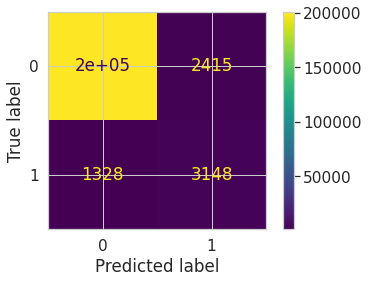

In [ ]:
xgboost(X_os,y_os,X_test,y_test)

## Observations

From the above two models we observe the following,

Accuracy - 
For Logistic Regression as our baseline model we have accuracy of 63% and the recall of 34% which is not a good score. 
For Random Forest and XGBoost, we have 1 as accuracy, but since we know that our class variable is highly imbalanced we can't use accuracy as the evaluation metrics.
Observing the confusion matrix, we see that in Random Forest, we get True Negatives, that is a fraud transaction is missclassified as non-fraud and the number is 540 and in XGBOOST we get 1328. In Fraud Detection, our goal is to either correctly maximize the prediction of Fraud Cases or either we try to reduce the True Negatives.
Observation

We used Random Forest as the BASELINE Model, and tried to reduce the True Negatives that is try to increase the Recall in our case. In Case of Fraud Detection, Recall will be priortized over Precision as if we missclassify, a fraud transaction as non-fraud it can cause heavy loss to a consumer. Therefore,our goal is to maximize recall or either rigtly classify the fraud transaction

For Solving the Imbalance Problem in the dataset

We try to use oversample our non-dominant class using SMOTE [Synthetic Minority Oversampling Technique] strategy. SMOTE works by utilizing a k-nearest neighbor algorithm to create synthetic data. SMOTE first start by choosing random data from the minority class, then k-nearest neighbors from the data are set. Synthetic data would then made between the random data and the randomly selected k-nearest neighbor.

WE used the SMOTE strategy and perform oversampling in our dataset, so that both the number of fraud and non-fraud cases are same, and then try to run the Random Forest and observe the classification reports.

The recall is 95% which is good enough

When including the fraud transactions 24 H column, It should've  logically made sense as if the bank labelled a transaction as fraud, then the transactions following it,   in the same day would automatically be fraud.
This is what the model meant to do in this case. Hence the correlation between fraud transactions 24 hours and label is 1 which is also showing data leakage.

This challenge meant to identify the "first" fraud transaction so I decided to not include this feature. 

## HOW TO DEPLOY IT IN PRODUCTION ENVIRONMENT ? 

Preparing the data on S3 Bucket

building the fraud detection model using Sagemaker

deploying the sagemaker ML model on AWS and triggering using Lambda to make online predictions on streaming data 

setting up alert-based fraud notifications using fraud triggers

Write stored events again to the same S3 bucket

### Preparing the data on S3 Bucket

Use Amazon services to store data on S3 Bucket




### Building Fraud Detection model in SAGEMAKER

We can choose among various classification algorithms to train the algorithm
XGBoost model can work really well because it didn't require much hyperparameter tuning to perform well, and can retain some level of model explainability



1.   Load data from S3 
2.   Preprocess and clean
3.   Train the model using Sagemaker
4.   Save the model Inference




### Hosting the Sagemaker model for online predictions on streaming data using lambda

Lambda can be used for both real-time predictions and batch inferences. In the case of credit card transactions, a Lambda trigger can ingest real-time data continuously and automatically scales based on the transaction volume without human involvement.. 



1.   Create a Lambda trigger that whenever a new Transaction is added to S3, it preprocesses the new Transaction data
2.   Call the model instance to see if the transaction is fraud
3.   create another trigger to notify the team if the transaction is fraud



### Concerns and Tradeoffs
We cannot so synchronous batch prediction in this case as Fraud detection needs to happen in real time so we can immdeiately put a stop to a transaction when the model predicts a transaction as fraud



##### Automated Machine Learning
If we just train a model once and never touch it again, we’re missing out the information more/new data could provide us.
This is especially important in environments where behaviors change quickly, so we need ML model that can learn from new examples in something closer to real time.


##### Model Drift
Model Drift is described as the change in the predictive power of ML model.
This happens when live data doesnot correctly represents the data that the model has been trained on

##### Model Staleness
Historical features may not be as important.Features used to train a model with curent data will also change

##### Negative Feedback loop
Refers to the model being influenced by self behaviour which makes makes it difficult to predict the behavior of a ML model. 
Hence it needs to be updated regularly 